In [141]:
import matplotlib.pyplot as plt
import numpy as np

In [142]:
b_plus = [4.77169 , -31.92102, 79.55245, -87.77001, 36.36364 ]
b_minus = [0.99713 , -9.37113, 34.96911, -59.82129, 38.92774 ]

In [143]:
x_plus = np.linspace(0.5, 1.)
x_minus = np.linspace(0., 0.5)

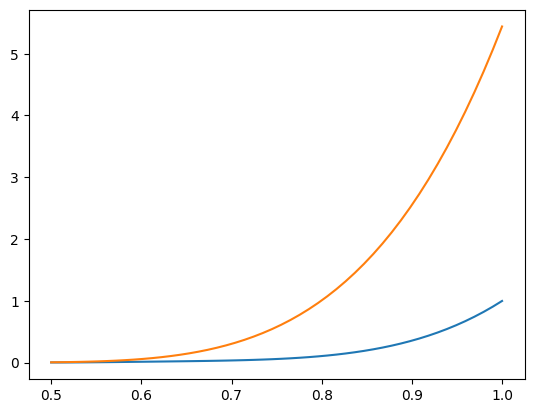

In [144]:
fig, ax = plt.subplots()

result = np.zeros_like(x_plus)
for i, b in enumerate(b_plus):
    result += b*x_plus**i
ax.plot(x_plus, result)
ax.plot(x_plus, 0.5*(x_plus-0.43)**2 + 50*(x_plus-0.43)**4)

In [145]:
fill_level_percent = np.linspace(0., 100.)

In [146]:
def cost_function_value(fill_level_percent: float, slack_variables: bool, input: float = None):
    cost_function_value = 0.5*((fill_level_percent-43)/100)**2 + 50*((fill_level_percent-43)/100)**4

    if slack_variables:
        if fill_level_percent > 95:
            cost_function_value += np.abs(fill_level_percent-95)/100 * 10
        elif fill_level_percent < 5:
            cost_function_value += np.abs(fill_level_percent-5)/100 * 10
    return cost_function_value

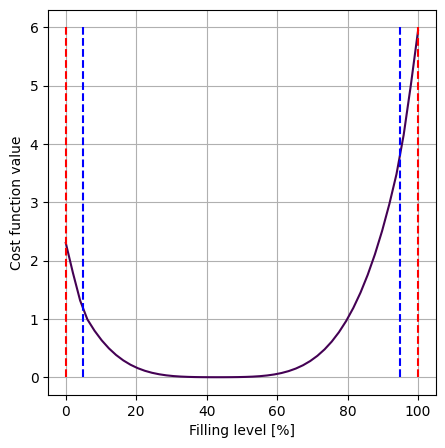

In [147]:
fig, ax = plt.subplots()

result = np.zeros_like(x_plus)
for i, b in enumerate(b_plus):
    result += b*x_plus**i

cmap = plt.colormaps.get_cmap("viridis")
color = cmap.resampled(1).colors[0]

ax.plot(fill_level_percent, np.array([cost_function_value(level, slack_variables=True) for level in fill_level_percent]), color=color)
ax.grid()
ax.set_xlabel("Filling level [%]")
ax.set_ylabel("Cost function value")

ax.vlines(0, ymin=0, ymax=6, colors="red", linestyles="--")
ax.vlines(100, ymin=0, ymax=6, colors="red", linestyles="--")
ax.vlines(5, ymin=0, ymax=6, colors="blue", linestyles="--")
ax.vlines(95, ymin=0, ymax=6, colors="blue", linestyles="--")


fig.set_size_inches(5,5)
fig.savefig(fname="/home/julius/Masterarbeit/ad_meal_prep_control/results/plots/cost_function.png",
            dpi=600,
            format="png",
            )